In [1]:
from aplf.kaggle.titanic import  graph
from distributed import Client, progress
import pandas as pd

/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
from ipywidgets import interact
import numpy as np

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [3]:
c = Client('dask-scheduler:8786')
c.restart()

Client Scheduler: tcp://dask-scheduler:8786 Dashboard: http://dask-scheduler:8787/status,Cluster Workers: 1 Cores: 2 Memory: 16.67 GB


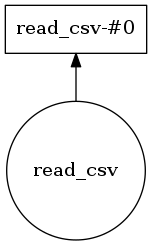

In [4]:
graph.train_df.visualize()

In [5]:
train_df = c.compute(graph.train_df, sync=True)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
preprocessed_train_df = c.compute(graph.preprocessed_train_df, sync=True)
preprocessed_train_df.head()

,FareBin,AgeBin,isAlone,TitleCode,Pclass,SexCode,Embarked
0,"[1.0, 0.0, 0.0, 0.0]","[0.0, 1.0, 0.0, 0.0, 0.0]","[1.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 0.0, 1.0]","[0.0, 1.0]","[0.0, 0.0, 1.0]"
1,"[0.0, 0.0, 0.0, 1.0]","[0.0, 0.0, 1.0, 0.0, 0.0]","[1.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 1.0, 0.0, 0.0]","[1.0, 0.0]","[1.0, 0.0, 0.0]"
2,"[0.0, 1.0, 0.0, 0.0]","[0.0, 1.0, 0.0, 0.0, 0.0]","[0.0, 1.0]","[0.0, 0.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 1.0]","[1.0, 0.0]","[0.0, 0.0, 1.0]"
3,"[0.0, 0.0, 0.0, 1.0]","[0.0, 0.0, 1.0, 0.0, 0.0]","[1.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 1.0, 0.0, 0.0]","[1.0, 0.0]","[0.0, 0.0, 1.0]"
4,"[0.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0]","[0.0, 1.0]","[0.0, 0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 0.0, 1.0]","[0.0, 1.0]","[0.0, 0.0, 1.0]"


In [8]:
print(preprocessed_train_df['isAlone'][0])

[1. 0.]


In [9]:
preprocessed_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
FareBin      891 non-null object
AgeBin       891 non-null object
isAlone      891 non-null object
TitleCode    891 non-null object
Pclass       891 non-null object
SexCode      891 non-null object
Embarked     891 non-null object
dtypes: object(7)
memory usage: 48.8+ KB


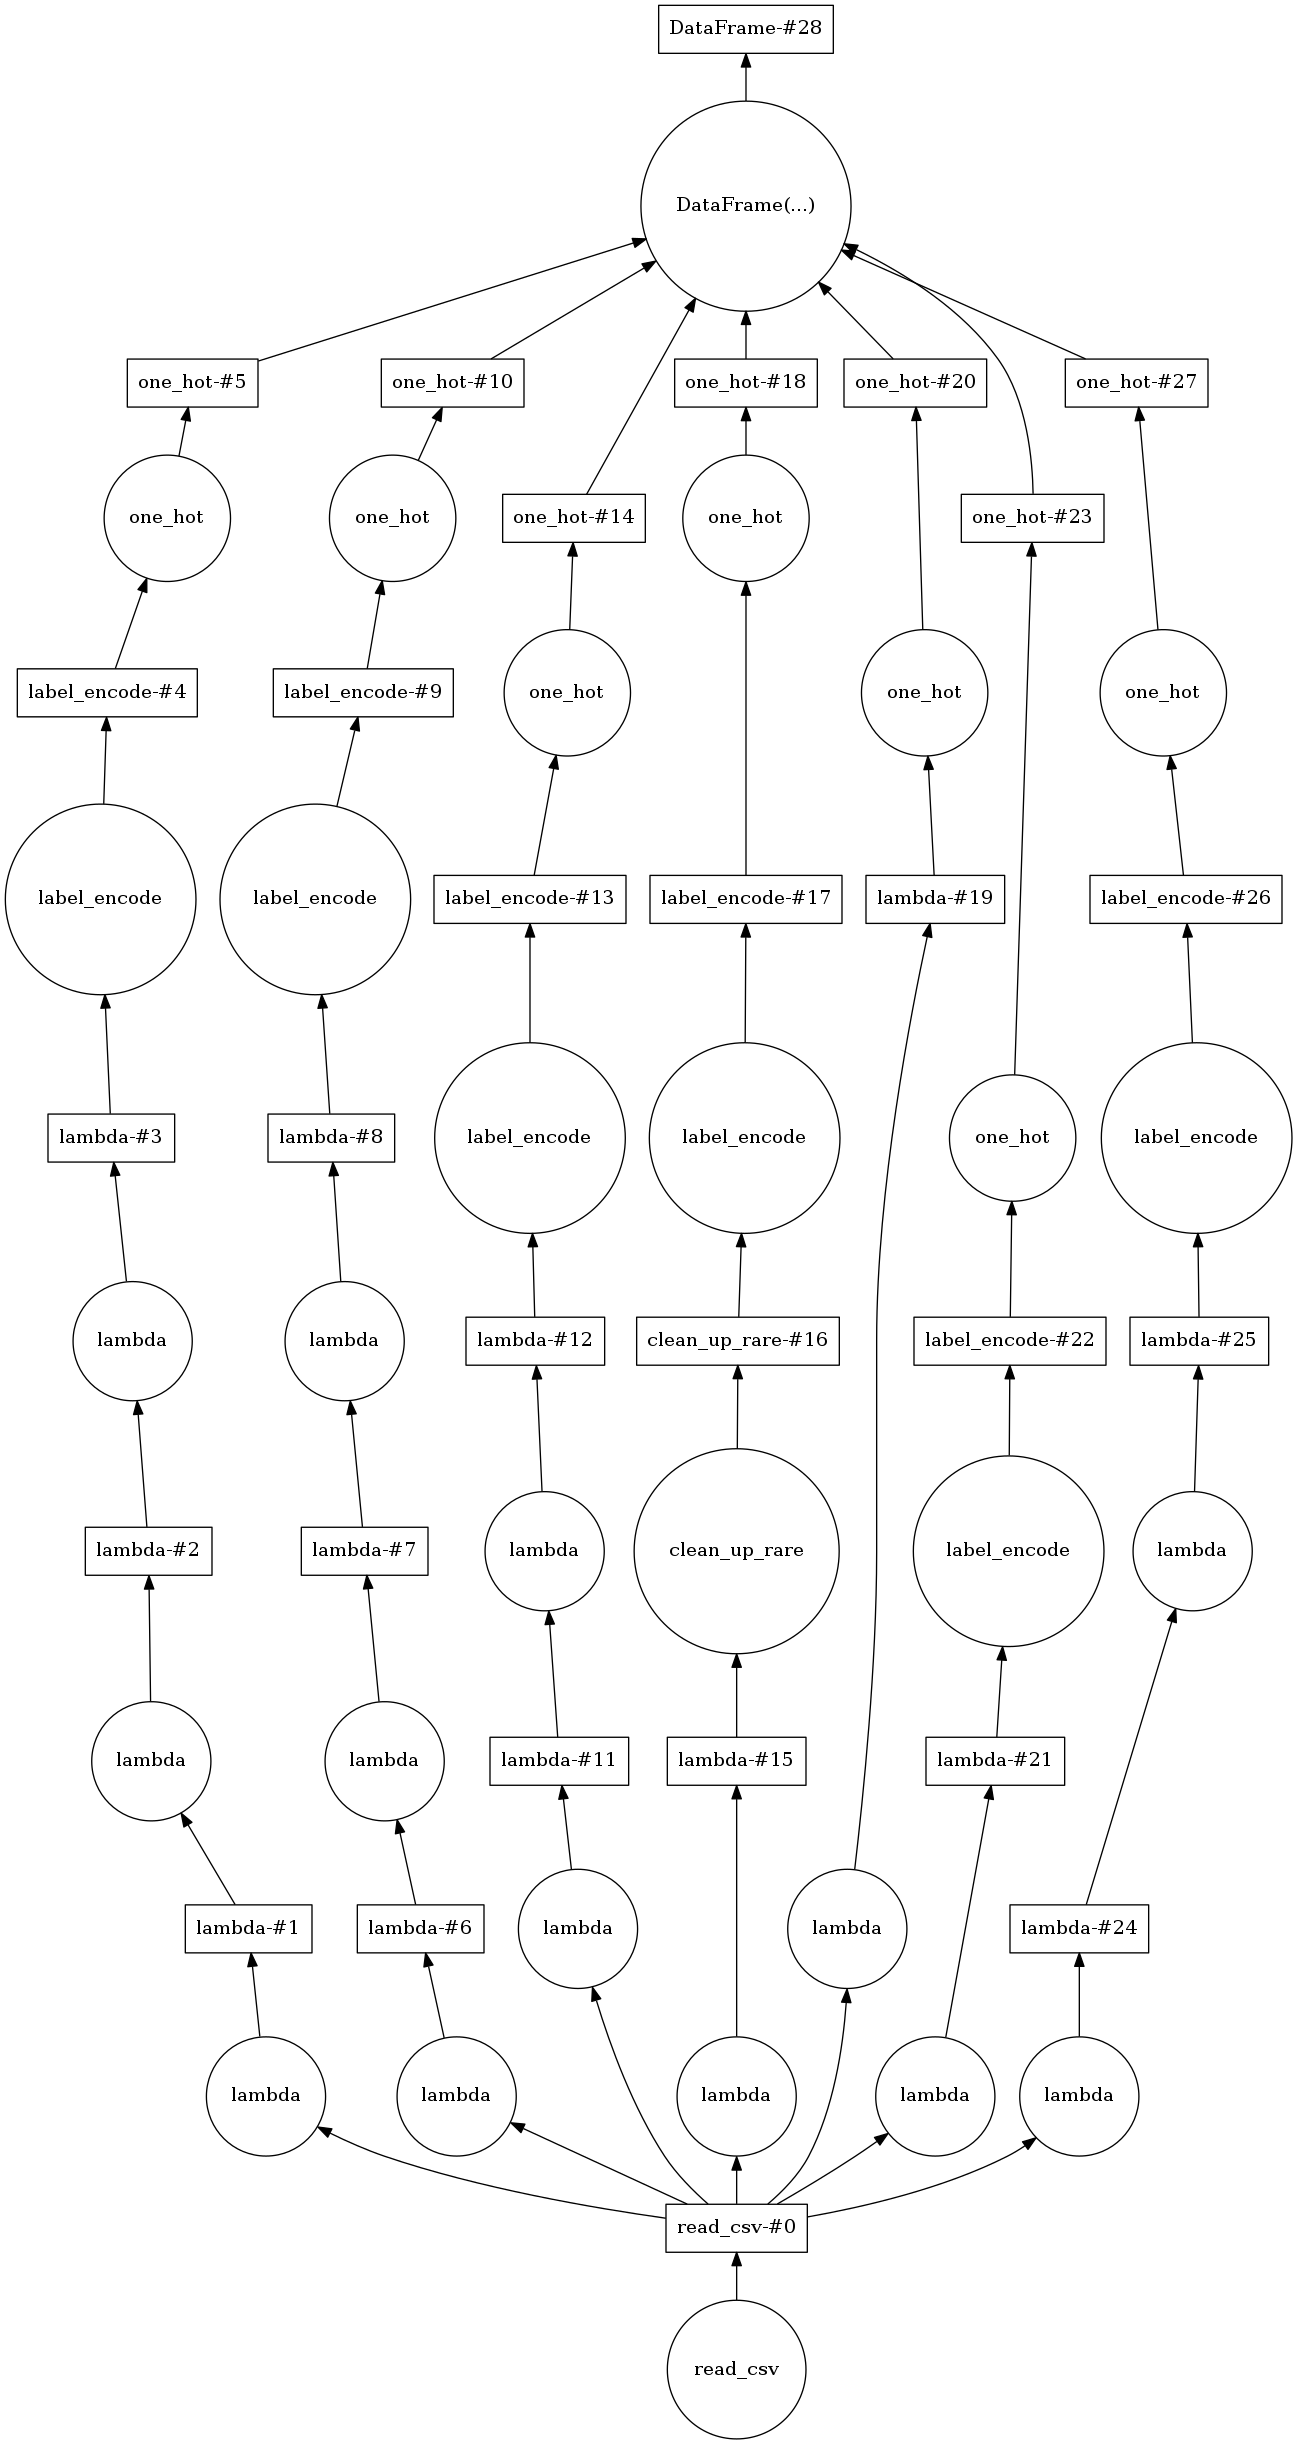

In [10]:
graph.preprocessed_train_df.visualize()